In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
# Ignore divide by 0 error
np.seterr(all='ignore')

import sys
sys.path.append('..')
from deap.mappers import PhotonicConvolverMapper

<IPython.core.display.Javascript object>


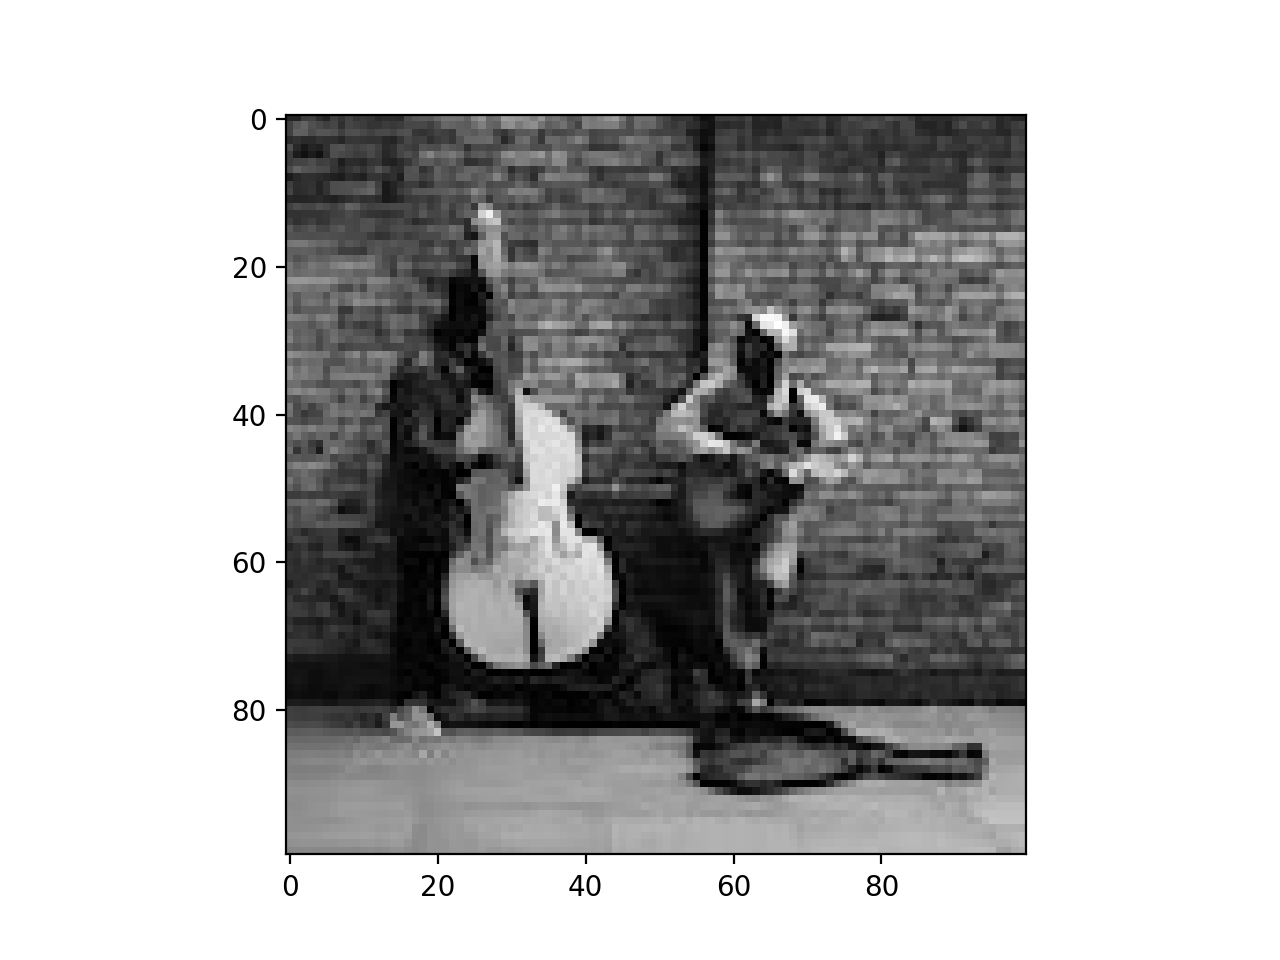

In [2]:
image = plt.imread("./img/bass.jpg")
greyscale = np.mean(image, axis=2)
plt.figure("Original Image, Greyscale")
plt.imshow(greyscale, cmap='gray')

In [3]:
gaussian_kernel = \
    np.array([
        [1, 2, 1],
        [2, 4, 2],
        [1, 2, 1]]) * 1/16

pc = PhotonicConvolverMapper.build(greyscale, gaussian_kernel, power=255)

<IPython.core.display.Javascript object>


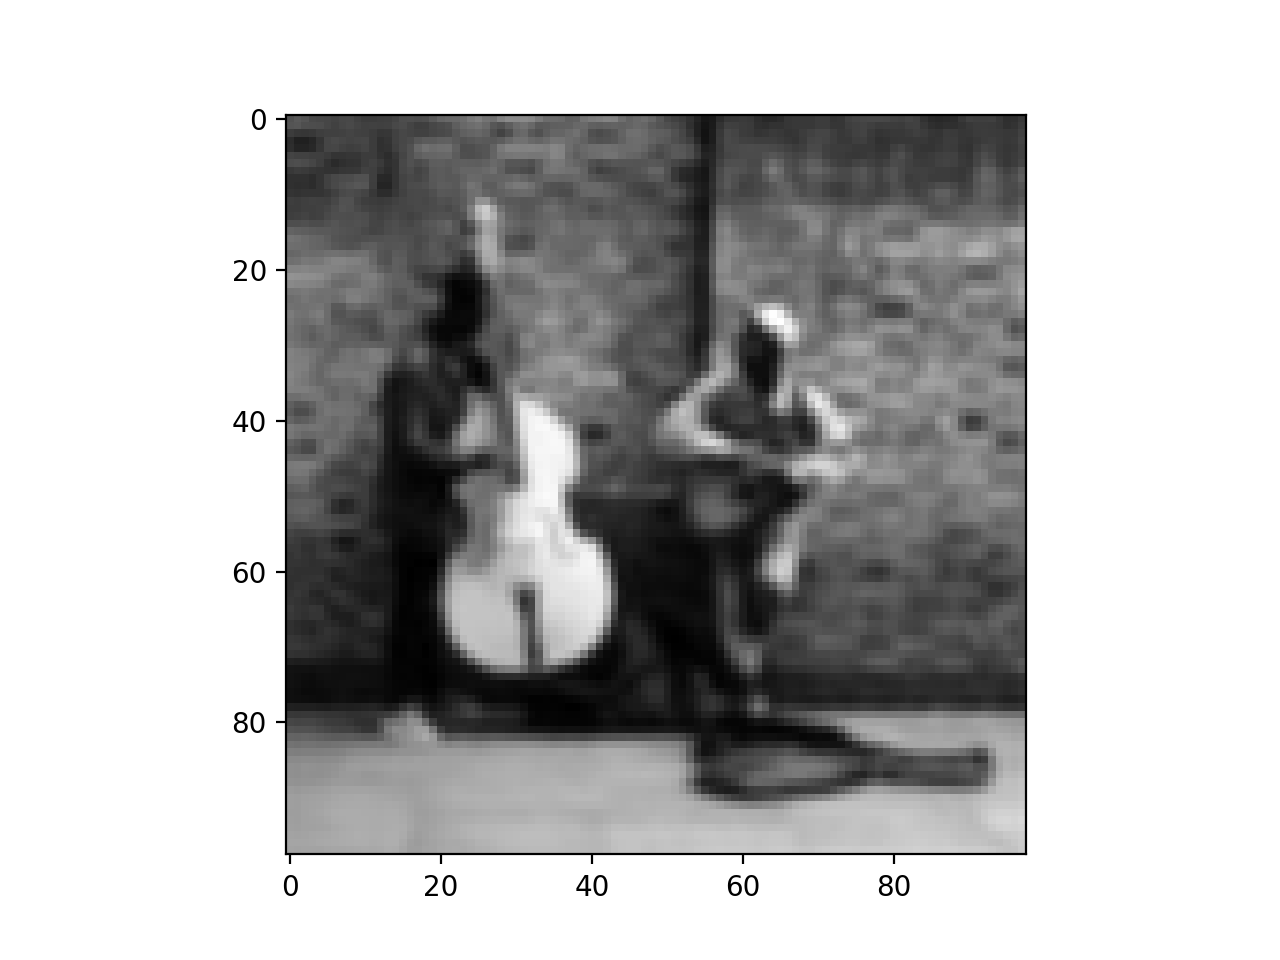

In [4]:
convolved = pc.step()

plt.figure()
plt.imshow(convolved, cmap='gray')

In [5]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print("Laser array shape: {}".format(pc.laserDiodeArray.shape))
print("Laser array power: {}".format(pc.laserDiodeArray.power))
print("Laser output shape: {}.".format(pc.laserDiodeArray.connections.shape))
print("Laser diode optical connections:")
for row in range(3):
    for col in range(3):
        print(" Diode: {1}, Modulator: {0}"
              .format(np.array([row, col]),
                      pc.laserDiodeArray.connections[row, col]))
print("etc ...\n")

print("Modulator array shape: {}".format(pc.modulatorArray.shape))
print("Modulator phase shifts:")
for row in range(3):
    for col in range(3):
        print("Modulator: {}, Phase: {:.5f} rad"
              .format(np.array([row, col]),
                      pc.modulatorArray.phaseShifts[row, col]))
print("etc ...\n")

print("Photonic array input shape: {}".format(pc.pwbArray.inputShape))
print("Photonic array output shape: {}".format(pc.pwbArray.pwbs.shape))
for row in range(3):
    for col in range(3):
        print("Neuron: {}".format(np.array([row, col])))
        print("   Output gain:", pc.pwbArray.pwbs[row, col].outputGain)
        print("   Phase: {}".format(pc.pwbArray.pwbs[row, col].phaseShifts))
        print("   Connected Modulators: ", end="")
        for conn in pc.pwbArray.connections[row, col]:
            print("{}".format(conn), end=" ")
        print("")
        
print("etc ... \n")

Laser array shape: (3, 3)
Laser array power: 255
Laser output shape: (100, 100, 2).
Laser diode optical connections:
 Diode: [0 0], Modulator: [0 0]
 Diode: [0 1], Modulator: [0 1]
 Diode: [0 2], Modulator: [0 2]
 Diode: [1 0], Modulator: [1 0]
 Diode: [1 1], Modulator: [1 1]
 Diode: [1 2], Modulator: [1 2]
 Diode: [2 0], Modulator: [2 0]
 Diode: [2 1], Modulator: [2 1]
 Diode: [2 2], Modulator: [2 2]
etc ...

Modulator array shape: (100, 100)
Modulator phase shifts:
Modulator: [0 0], Phase: 0.08756 rad
Modulator: [0 1], Phase: 0.08614 rad
Modulator: [0 2], Phase: 0.12076 rad
Modulator: [1 0], Phase: 0.12382 rad
Modulator: [1 1], Phase: 0.15321 rad
Modulator: [1 2], Phase: 0.16863 rad
Modulator: [2 0], Phase: 0.12426 rad
Modulator: [2 1], Phase: 0.16578 rad
Modulator: [2 2], Phase: 0.16294 rad
etc ...

Photonic array input shape: (100, 100)
Photonic array output shape: (98, 98)
Neuron: [0 0]
   Output gain: 1.0
   Phase: [0.019 0.016 0.017 0.016 0.000 0.008 0.017 0.008 0.011]
   Connec